# Fases producción: anomalies detection and analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

## Preinóculo

### Load and anomalies checks

In [2]:

pino = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Preinóculo', skiprows=1)


In [3]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LOTE               165 non-null    object        
 1   Fecha/hora inicio  165 non-null    datetime64[ns]
 2   Fecha/hora fin     165 non-null    datetime64[ns]
 3   línea 1            163 non-null    float64       
 4   línea 2            152 non-null    float64       
 5   línea 3            138 non-null    object        
 6   línea 1.1          163 non-null    float64       
 7   línea 2.1          152 non-null    float64       
 8   línea 3.1          139 non-null    object        
 9   línea 1.2          165 non-null    int64         
 10  línea 2.2          165 non-null    int64         
 11  línea 3.2          165 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 15.6+ KB


In [4]:
columns = ['Lote',
           'f_h_inicio',
              'f_h_fin',
              'ph_1',
               'ph_2',
               'ph_3',
               'turb_1',
               'turb_2',
               'turb_3',
               'usada_1',
               'usada_2',
               'usada_3'

           ]
pino.columns = columns

In [5]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Lote        165 non-null    object        
 1   f_h_inicio  165 non-null    datetime64[ns]
 2   f_h_fin     165 non-null    datetime64[ns]
 3   ph_1        163 non-null    float64       
 4   ph_2        152 non-null    float64       
 5   ph_3        138 non-null    object        
 6   turb_1      163 non-null    float64       
 7   turb_2      152 non-null    float64       
 8   turb_3      139 non-null    object        
 9   usada_1     165 non-null    int64         
 10  usada_2     165 non-null    int64         
 11  usada_3     165 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 15.6+ KB


#### Duplicated checks

In [6]:
# Number of dupe rows
print(pino.duplicated().sum())

1


In [7]:
# Print dupe row
print(pino[pino.duplicated()])

      Lote          f_h_inicio             f_h_fin   ph_1   ph_2   ph_3  \
115  24020 2024-01-25 00:30:00 2024-01-26 07:00:00  5.448  5.504  5.528   

     turb_1  turb_2 turb_3  usada_1  usada_2  usada_3  
115   35.04   24.16  25.44        1        0        1  


In [8]:
# Drop dupe row
pino = pino.drop_duplicates()

### Lote

In [9]:
# Lote is an object. Which values are non-digits?
# First to str
pino['Lote'] = pino['Lote'].astype(str)
# Then find non-digit values
pino[pino['Lote'].str.contains('[\D]')]


,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
86,P23462,2023-11-12 00:30:00,2023-11-13 07:25:00,5.432,5.352,NaN,28.64,26.8,NaN,0,1,0


### Ph_3 and turb_3

In [10]:
# ph_3 is an object. Which values are non-digits?
# First to str
pino['ph_3'] = pino['ph_3'].astype(str)
# Then find non-digit values
pino[pino['ph_3'].str.contains('[\D][.]')]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
6,23029,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,N.A,30.00,30.32,N.A,1,1,0
7,23030,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,N.A,30.00,30.32,N.A,1,1,0
8,23031,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,N.A,32.08,32.96,N.A,1,1,0
9,23032,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,N.A,32.08,32.96,N.A,1,1,0
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.52,5.520,N.A,25.68,26.56,N.A,1,0,0


In [11]:
# Change to NaN and then to float
pino['ph_3'] = pino['ph_3'].replace('N.A', 'NaN').astype(float)

In [12]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Lote        164 non-null    object        
 1   f_h_inicio  164 non-null    datetime64[ns]
 2   f_h_fin     164 non-null    datetime64[ns]
 3   ph_1        162 non-null    float64       
 4   ph_2        151 non-null    float64       
 5   ph_3        132 non-null    float64       
 6   turb_1      162 non-null    float64       
 7   turb_2      151 non-null    float64       
 8   turb_3      138 non-null    object        
 9   usada_1     164 non-null    int64         
 10  usada_2     164 non-null    int64         
 11  usada_3     164 non-null    int64         
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 16.7+ KB


#### Looks like NA is typed as N.A instead

In [13]:
# turb_3 is an object. Which values are non-digits?
# First to str
pino['turb_3'] = pino['turb_3'].astype(str)
# Then find non-digit values
pino[pino['turb_3'].str.contains('[\D][.]')]


,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
6,23029,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,NaN,30.00,30.32,N.A,1,1,0
7,23030,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,NaN,30.00,30.32,N.A,1,1,0
8,23031,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,NaN,32.08,32.96,N.A,1,1,0
9,23032,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,NaN,32.08,32.96,N.A,1,1,0
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.52,5.520,NaN,25.68,26.56,N.A,1,0,0


In [14]:
# Change to NaN and then to float
pino['turb_3'] = pino['turb_3'].replace('N.A', 'NaN').astype(float)

In [15]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Lote        164 non-null    object        
 1   f_h_inicio  164 non-null    datetime64[ns]
 2   f_h_fin     164 non-null    datetime64[ns]
 3   ph_1        162 non-null    float64       
 4   ph_2        151 non-null    float64       
 5   ph_3        132 non-null    float64       
 6   turb_1      162 non-null    float64       
 7   turb_2      151 non-null    float64       
 8   turb_3      133 non-null    float64       
 9   usada_1     164 non-null    int64         
 10  usada_2     164 non-null    int64         
 11  usada_3     164 non-null    int64         
dtypes: datetime64[ns](2), float64(6), int64(3), object(1)
memory usage: 16.7+ KB


In [16]:
# Null values for ph_3
pino[pino['ph_3'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
6,23029,2023-04-15 05:30:00,2023-04-16 06:30:00,5.520,5.520,NaN,30.00,30.32,NaN,1,1,0
7,23030,2023-04-15 05:30:00,2023-04-16 06:30:00,5.520,5.520,NaN,30.00,30.32,NaN,1,1,0
8,23031,2023-04-15 05:30:00,2023-04-16 06:30:00,5.520,5.512,NaN,32.08,32.96,NaN,1,1,0
9,23032,2023-04-15 05:30:00,2023-04-16 06:30:00,5.520,5.512,NaN,32.08,32.96,NaN,1,1,0
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.520,5.520,NaN,25.68,26.56,NaN,1,0,0
19,23042,2023-05-29 05:00:00,2023-05-30 07:30:00,5.512,5.472,NaN,24.80,27.12,NaN,0,1,0
20,23044,2023-06-04 05:00:00,2023-06-05 08:00:00,5.488,5.552,NaN,30.48,26.80,NaN,1,1,0
49,23075,2023-07-29 05:00:00,2023-07-31 07:15:00,5.464,NaN,NaN,42.56,NaN,NaN,1,0,0
51,23076,2023-07-30 05:00:00,2023-07-31 07:00:00,5.376,NaN,NaN,34.88,NaN,NaN,1,0,0
52,23077,2023-09-02 05:00:00,2023-09-03 07:45:00,5.424,5.440,NaN,30.96,32.16,NaN,1,1,0


In [17]:
# Values that arenull for ph_3 and not for turb_3
pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()]


,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
144,24075,2024-05-12 00:30:00,2024-05-13 07:54:00,5.424,5.424,NaN,25.12,26.96,27.84,0,1,1


#### This linea 3 value is used, despite NaN values. We should drop this later

In [18]:
# Drop row pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()]
#pino = pino.drop(pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()].index)

### Fechas y duracion

In [19]:
## Make new column with Duracion
pino['duracion'] = pino['f_h_fin'] - pino['f_h_inicio']


In [20]:
pino['duracion'].describe()

count                          164
mean     0 days 19:10:03.292682926
std      4 days 07:43:24.666420264
min             -30 days +02:30:00
25%                1 days 02:45:00
50%                1 days 06:45:00
75%                1 days 07:05:00
max               11 days 01:42:00
Name: duracion, dtype: object

#### Something is weird with the dates

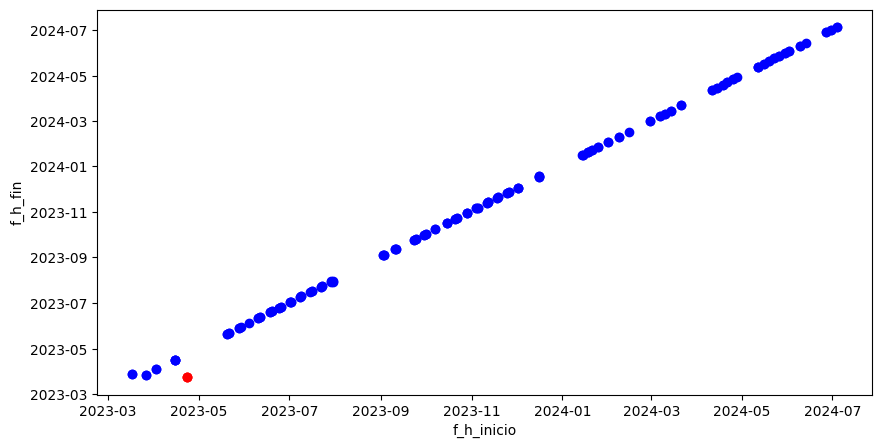

In [21]:
def plot_fechas(df, col1, col2):
    # Scatter plot of col1 vs fecha de fin real
    # Whenever the col1 is greater than fecha de fin real, the point will be red
    # Whenever the col1 is less than fecha de fin real, the point will be blue
    # If it is equal, it will be yellow
    plt.figure(figsize=(10, 5))
    for index, row in df.iterrows():
        if row[col1] > row[col2]:
            plt.scatter(row[col1], row[col2], color='red')
        elif row[col1] < row[col2]:
            plt.scatter(row[col1], row[col2], color='blue')
        else:
            plt.scatter(row[col1], row[col2], color='yellow')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

plot_fechas(pino, 'f_h_inicio', 'f_h_fin')

In [22]:
# Is it only an isolated datapoint that is wrong?
pino[pino['f_h_inicio'] > pino['f_h_fin']]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
10,23033,2023-04-23 05:00:00,2023-03-24 13:30:00,5.448,5.456,5.392,28.08,28.24,29.44,1,0,1,-30 days +08:30:00
11,23034,2023-04-23 05:00:00,2023-03-24 13:30:00,5.448,5.456,5.392,28.08,28.24,29.44,1,0,1,-30 days +08:30:00
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.520,5.520,NaN,25.68,26.56,NaN,1,0,0,-30 days +02:30:00


#### Given that most of the times it is around 0 or 1 days to complete
#### It is likely that this date was 2023-03-23 but it was written as 2023-04-23 by human error.
#### We should drop it for now

In [23]:
# Remove the row
pino = pino[pino['f_h_inicio'] < pino['f_h_fin']]

In [24]:
# Make duracion again
pino['duracion'] = pino['f_h_fin'] - pino['f_h_inicio']

In [25]:
pino['duracion'].describe()

count                          161
mean     1 days 08:49:11.180124223
std      1 days 02:36:00.051739875
min                0 days 02:10:00
25%                1 days 02:45:00
50%                1 days 06:45:00
75%                1 days 07:05:00
max               11 days 01:42:00
Name: duracion, dtype: object

### ph_2

In [26]:
# is ph2 loaded correctly?
pino[pino['ph_2'].astype(str).str.contains('[\D][.]')]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [27]:
# ph2 null values
pino[pino['ph_2'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
49,23075,2023-07-29 05:00:00,2023-07-31 07:15:00,5.464,NaN,NaN,42.56,NaN,NaN,1,0,0,2 days 02:15:00
51,23076,2023-07-30 05:00:00,2023-07-31 07:00:00,5.376,NaN,NaN,34.88,NaN,NaN,1,0,0,1 days 02:00:00
56,23081,2023-09-10 05:00:00,2023-09-11 08:00:00,5.496,NaN,5.504,28.40,NaN,28.00,1,0,1,1 days 03:00:00
57,23082,2023-09-10 05:00:00,2023-09-11 08:00:00,5.496,NaN,5.504,28.40,NaN,28.00,1,0,1,1 days 03:00:00
58,23083,2023-09-11 05:00:00,2023-09-12 07:45:00,5.424,NaN,5.448,29.20,NaN,30.48,1,0,1,1 days 02:45:00
59,23084,2023-09-11 05:00:00,2023-09-12 07:45:00,5.424,NaN,5.448,29.20,NaN,30.48,1,0,1,1 days 02:45:00
71,23097,2023-10-15 00:30:00,2023-10-16 07:30:00,5.352,NaN,NaN,34.08,NaN,NaN,1,0,0,1 days 07:00:00
89,23118,2023-11-18 00:30:00,2023-11-19 07:30:00,5.352,NaN,5.368,39.92,NaN,37.68,1,0,1,1 days 07:00:00
90,23119,2023-11-18 00:30:00,2023-11-19 07:30:00,5.352,NaN,5.368,39.92,NaN,37.68,1,0,1,1 days 07:00:00
95,23126,2023-11-26 00:30:00,2023-11-27 07:15:00,5.432,NaN,5.384,29.20,NaN,27.04,1,0,1,1 days 06:45:00


In [28]:
# Whenever ph_2 is null, turb_2 is also null and viceversa
pino[pino['ph_2'].isnull() & pino['turb_2'].notnull()]


,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [29]:
# Whenever ph_2 is null, turb_2 is also null and viceversa
pino[pino['ph_2'].notnull() & pino['turb_2'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [30]:
# Whenever ph_2 or turb_2 is null, usada_2 is 0
pino[(pino['ph_2'].isnull() | pino['turb_2'].isnull())  & pino['usada_2'] != 0]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


### ph_3

In [31]:
# whenever ph_3 is null, turb_3 is also null and viceversa
pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
144,24075,2024-05-12 00:30:00,2024-05-13 07:54:00,5.424,5.424,NaN,25.12,26.96,27.84,0,1,1,1 days 07:24:00


In [32]:
# whenever ph_3 is null, turb_3 is also null and viceversa
pino[pino['ph_3'].notnull() & pino['turb_3'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [33]:
# whenever ph_3 or turb_3 is null, usada_3 is 0
pino[(pino['ph_3'].isnull() | pino['turb_3'].isnull())  & pino['usada_3'] != 0]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
144,24075,2024-05-12 00:30:00,2024-05-13 07:54:00,5.424,5.424,NaN,25.12,26.96,27.84,0,1,1,1 days 07:24:00


### ph_1

In [34]:
# ph_1 null values
pino[pino['ph_1'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
80,23108,2023-11-04 00:30:00,2023-11-05 09:45:00,NaN,5.416,5.4,NaN,35.6,34.4,0,1,1,1 days 09:15:00
81,23109,2023-11-04 00:30:00,2023-11-05 09:45:00,NaN,5.416,5.4,NaN,35.6,34.4,0,1,1,1 days 09:15:00


In [35]:
# whenever ph_1 is null, turb_1 is also null and viceversa
pino[pino['ph_1'].isnull() & pino['turb_1'].notnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [36]:
# whenever ph_1 is null, turb_1 is also null and viceversa
pino[pino['ph_1'].notnull() & pino['turb_1'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [37]:
# whenever ph_1 or turb_1 is null, usada_1 is 0
pino[(pino['ph_1'].isnull() | pino['turb_1'].isnull())  & pino['usada_1'] != 0]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


### Usadas


In [38]:
# Lineas usadas, are they all 1 values
print(pino['usada_1'].unique())
print(pino['usada_2'].unique())
print(pino['usada_3'].unique())


[1 0]
[1 0]
[0 1]


In [39]:
# Are there rows with all 0 values?
pino[(pino['usada_1'] == 0) & (pino['usada_2'] == 0) & (pino['usada_3'] == 0)]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [40]:
# Are there rows with all 1 values?
pino[(pino['usada_1'] == 1) & (pino['usada_2'] == 1) & (pino['usada_3'] == 1)]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [41]:
# Are there rows with only 1 value?
pino[(pino['usada_1'] == 1) & (pino['usada_2'] == 0) & (pino['usada_3'] == 0)]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
49,23075,2023-07-29 05:00:00,2023-07-31 07:15:00,5.464,NaN,NaN,42.56,NaN,NaN,1,0,0,2 days 02:15:00
51,23076,2023-07-30 05:00:00,2023-07-31 07:00:00,5.376,NaN,NaN,34.88,NaN,NaN,1,0,0,1 days 02:00:00
71,23097,2023-10-15 00:30:00,2023-10-16 07:30:00,5.352,NaN,NaN,34.08,NaN,NaN,1,0,0,1 days 07:00:00
91,23120,2023-11-19 00:30:00,2023-11-20 07:45:00,5.320,5.384,NaN,32.16,31.44,NaN,1,0,0,1 days 07:15:00
92,23121,2023-11-19 00:30:00,2023-11-20 07:50:00,5.232,5.408,NaN,28.72,25.76,NaN,1,0,0,1 days 07:20:00
97,23131,2023-12-02 00:30:00,2023-12-03 06:55:00,5.376,5.424,NaN,35.12,35.52,NaN,1,0,0,1 days 06:25:00
107,24005,2024-01-18 00:30:00,2024-01-19 07:15:00,5.360,5.440,NaN,28.96,26.48,NaN,1,0,0,1 days 06:45:00
116,24021,2024-02-01 00:30:00,2024-02-02 07:10:00,5.280,5.440,NaN,37.68,26.72,NaN,1,0,0,1 days 06:40:00
158,24098,2024-06-13 00:30:00,2024-06-14 08:00:00,5.672,5.608,5.608,23.04,22.56,20.96,1,0,0,1 days 07:30:00


In [42]:
# Are there rows with only 1 value?
pino[(pino['usada_1'] == 0) & (pino['usada_2'] == 1) & (pino['usada_3'] == 0)]  

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
19,23042,2023-05-29 05:00:00,2023-05-30 07:30:00,5.512,5.472,NaN,24.80,27.12,NaN,0,1,0,1 days 02:30:00
78,23104,2023-10-29 00:30:00,2023-10-30 09:45:00,5.376,5.336,NaN,32.16,36.08,NaN,0,1,0,1 days 09:15:00
86,P23462,2023-11-12 00:30:00,2023-11-13 07:25:00,5.432,5.352,NaN,28.64,26.80,NaN,0,1,0,1 days 06:55:00
114,24019,2024-02-01 00:30:00,2024-02-02 07:20:00,5.520,5.360,NaN,35.20,37.04,NaN,0,1,0,1 days 06:50:00
119,24031,2024-02-15 00:30:00,2024-02-16 07:30:00,5.768,5.488,NaN,24.48,32.96,NaN,0,1,0,1 days 07:00:00
120,24035,2024-02-29 00:30:00,2024-03-01 07:00:00,5.440,5.448,5.512,26.88,31.12,28.8,0,1,0,1 days 06:30:00
121,24036,2024-02-29 00:30:00,2024-03-01 07:00:00,5.440,5.448,5.512,26.88,31.12,28.8,0,1,0,1 days 06:30:00
140,24071,2024-04-28 00:30:00,2024-04-29 07:45:00,6.280,5.488,NaN,27.36,24.88,NaN,0,1,0,1 days 07:15:00
141,24072,2024-05-12 00:30:00,2024-05-13 08:16:00,5.424,5.424,NaN,25.36,30.96,NaN,0,1,0,1 days 07:46:00


In [43]:
# Are there rows with only 1 value?
pino[(pino['usada_1'] == 0) & (pino['usada_2'] == 0) & (pino['usada_3'] == 1)]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


## Inóculo

### Load and anomalies check

In [44]:
ino = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Inóculo')

In [45]:
ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   LOTE                      168 non-null    object        
 1   ID bioreactor             168 non-null    int64         
 2   Fecha/hora inicio         164 non-null    datetime64[ns]
 3   Fecha/hora fin            164 non-null    datetime64[ns]
 4   Volumen de cultivo        164 non-null    float64       
 5   Turbidez inicio cultivo   162 non-null    float64       
 6   Turbidez final culttivo   168 non-null    float64       
 7   Viabilidad final cultivo  168 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [46]:
#  Rename Turbidez final culttivo to Turbidez final cultivo
ino = ino.rename(columns={'Turbidez final culttivo': 'Turbidez final cultivo'})

In [47]:
ino.head()

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000
4,23023,14618,2023-03-27 07:22:00,2023-03-28 07:29:00,155.2,18.24,31.68,106400000


### Duplicated rows

In [48]:
# Number of dupe rows
print(ino.duplicated().sum())

1


In [49]:
print(ino[ino.duplicated()])

      LOTE  ID bioreactor   Fecha/hora inicio      Fecha/hora fin  \
119  24020          13171 2024-01-26 07:00:00 2024-01-27 07:10:00   

     Volumen de cultivo  Turbidez inicio cultivo  Turbidez final cultivo  \
119               160.0                    15.52                   30.64   

    Viabilidad final cultivo  
119                 95200000  


In [50]:
# Drop dupe row
ino = ino.drop_duplicates()

### Lote

In [51]:
# Lote is an object. Which values are non-digits?
# First to str
ino['LOTE'] = ino['LOTE'].astype(str)
# Then find non-digit values
ino[ino['LOTE'].str.contains('[\D]')]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
90,P23462,13171,2023-11-13 07:25:00,2023-11-14 07:20:00,80.0,12.96,25.52,142400000


#### This LOTE has already been located at other datapoints

In [52]:
ino['LOTE'].value_counts()

LOTE
23019    1
23020    1
23021    1
23022    1
23023    1
        ..
24101    1
24103    1
24104    1
24105    1
24108    1
Name: count, Length: 167, dtype: int64

#### Remember to cross the LOTE with other datasets.

### ID bioreactor

In [53]:
# Looks like ID is loaded as int, which should mean no non-digit values
ino['ID bioreactor'].astype(str).str.contains('[\D]').sum()

np.int64(0)

In [54]:
# There are also no null values but we should have this as str
ino['ID bioreactor'] = ino['ID bioreactor'].astype(str)

In [55]:
# Unique values
ino['ID bioreactor'].value_counts()

ID bioreactor
13171    60
14618    55
13172    52
Name: count, dtype: int64

#### We should check unique values to cross with other data

### Viabilidad final cultivo

In [56]:
# Show viabilidad values
ino['Viabilidad final cultivo'].value_counts()

Viabilidad final cultivo
104000000    8
86400000     8
91200000     8
83200000     7
88000000     6
            ..
167200000    1
66640000     1
1,27+e08     1
79760000     1
54240000     1
Name: count, Length: 64, dtype: int64

In [57]:
# Viabilidad final cultivo is an object. Which values are non-digits?
# First to str
ino['Viabilidad final cultivo'] = ino['Viabilidad final cultivo'].astype(str)
# Then find non-digit values
ino[ino['Viabilidad final cultivo'].str.contains('[\D]')]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
118,24019,13171,2024-02-02 07:20:00,2024-02-03 07:00:00,80.0,14.32,26.48,"1,27+e08"


#### It looks like there is only one wrong entry

In [58]:
# Fix the entry with LOTE == 24019 to be 1.27E+08
ino.loc[ino['LOTE'] == '24019', 'Viabilidad final cultivo'] = '1.27E+08'
# To float
ino['Viabilidad final cultivo'] = ino['Viabilidad final cultivo'].astype(float)



In [59]:
# Get LOTE 24019
ino[ino['LOTE'] == '24019']['Viabilidad final cultivo']

118    127000000.0
Name: Viabilidad final cultivo, dtype: float64

In [60]:
# Null values for Viabilidad final cultivo
ino[ino['Viabilidad final cultivo'].isnull()]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo


### Volumen cultivo

In [61]:
# Null values for Volumen cultivo
ino[ino['Volumen de cultivo'].isnull()]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000.0
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000.0
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000.0
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000.0


#### We should check if those LOTEs are in another dataset if these features end up being important

In [62]:
# Range of Volumen cultivo
ino['Volumen de cultivo'].min(), ino['Volumen de cultivo'].max()

(np.float64(79.2), np.float64(176.0))

### Turbidez final cultivo

In [63]:
# Range of Turbidez final cultivo
ino['Turbidez final cultivo'].min(), ino['Turbidez final cultivo'].max()

(np.float64(17.680000000000003), np.float64(32.88))

### Turbidez inicio cultivo

In [64]:
# Null values for Turbidez final cultivo
ino[ino['Turbidez inicio cultivo'].isnull()]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000.0
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000.0
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000.0
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000.0
37,23056,13171,2023-07-02 08:35:00,2023-07-03 08:35:00,168.8,NaN,27.04,112000000.0
38,23057,13171,2023-07-02 08:35:00,2023-07-03 08:35:00,168.8,NaN,27.04,112000000.0


In [65]:
# Range of Turbidez inicio cultivo
ino['Turbidez inicio cultivo'].min(), ino['Turbidez inicio cultivo'].max()

(np.float64(11.2), np.float64(21.52))

### Diff turbidez

In [66]:
# Compute the difference between Turbidez final cultivo and Turbidez inicio cultivo
ino['Turbidez_diff'] = ino['Turbidez final cultivo'] - ino['Turbidez inicio cultivo']

### Fechas

In [67]:
## There are 4 null values for Fecha/hora inicio cultivo and they are the same for Fecha/hora fin cultivo
ino[ino['Fecha/hora inicio'].isnull()]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo,Turbidez_diff
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000.0,NaN
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000.0,NaN
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000.0,NaN
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000.0,NaN


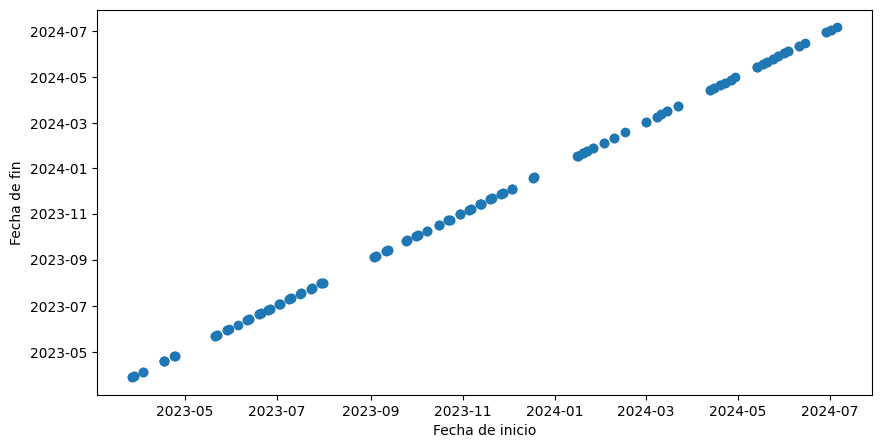

In [68]:
# Scatter plot of Fecha/hora inicio and Fecha/hora fin
plt.figure(figsize=(10, 5))
plt.scatter(ino['Fecha/hora inicio'], ino['Fecha/hora fin'])
plt.xlabel('Fecha de inicio')
plt.ylabel('Fecha de fin')
plt.show()

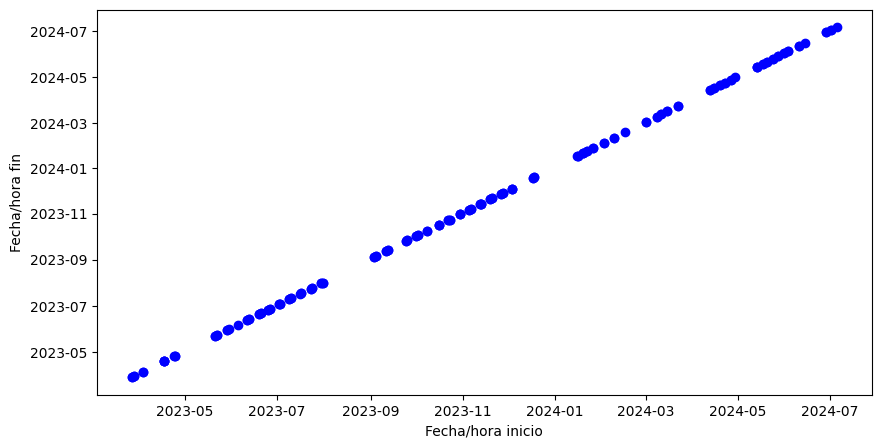

In [69]:
def plot_fechas(df, col1, col2):
    # Scatter plot of col1 vs fecha de fin real
    # Whenever the col1 is greater than fecha de fin real, the point will be red
    # Whenever the col1 is less than fecha de fin real, the point will be blue
    # If it is equal, it will be yellow
    plt.figure(figsize=(10, 5))
    for index, row in df.iterrows():
        if row[col1] > row[col2]:
            plt.scatter(row[col1], row[col2], color='red')
        elif row[col1] < row[col2]:
            plt.scatter(row[col1], row[col2], color='blue')
        else:
            plt.scatter(row[col1], row[col2], color='yellow')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

plot_fechas(ino, 'Fecha/hora inicio', 'Fecha/hora fin')

In [70]:
## Is there any date that is wrong?
ino[ino['Fecha/hora inicio'] > ino['Fecha/hora fin']]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo,Turbidez_diff


### Duracion

In [71]:
# Make new column for duration
ino['Duracion'] = ino['Fecha/hora fin'] - ino['Fecha/hora inicio']

In [72]:
ino['Duracion'].describe()

count                          163
mean     1 days 00:27:03.680981595
std      0 days 01:18:54.383419911
min                0 days 22:05:00
25%                0 days 23:50:00
50%                1 days 00:05:00
75%                1 days 00:51:00
max                1 days 06:10:00
Name: Duracion, dtype: object

## Cultivo final

In [73]:
cultivo = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Cultivo final') 

In [74]:
cultivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 22 non-null     float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  147 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    object        
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     14

### Duplicated rows

In [75]:
# Number of dupe rows
print(cultivo.duplicated().sum())

0


### LOTE

In [76]:
# LOTE is loaded as int, which likely means no non-digit values
cultivo['LOTE'].astype(str).str.contains('[\D]').sum()

np.int64(0)

In [77]:
# LOTE value counts
cultivo['LOTE'].value_counts()

LOTE
23019    1
23020    1
23021    1
23022    1
23023    1
        ..
24049    1
24050    1
24051    1
24052    1
24053    1
Name: count, Length: 152, dtype: int64

In [78]:
# LOTE should be str
cultivo['LOTE'] = cultivo['LOTE'].astype(str)


### Orden en el encadenado

In [79]:
# Orden is int, which likely means no non-digit values
cultivo['Orden en el encadenado'].astype(str).str.contains('[\D]').sum()

np.int64(0)

In [80]:
# Orden value counts
cultivo['Orden en el encadenado'].value_counts()

Orden en el encadenado
1    127
2     23
3      2
Name: count, dtype: int64

In [81]:
# To str
cultivo['Orden en el encadenado'] = cultivo['Orden en el encadenado'].astype(str)  

### LOTE parental

In [82]:
# LOTE parental is float? Find the decimals and extract them
cultivo['LOTE parental'].astype(str).str.extract(r'(\.\d+)').dropna().value_counts()

0 
.0    22
Name: count, dtype: int64

In [83]:
# It is float because int cannot be NaN. Change to str
cultivo['LOTE parental'] = cultivo['LOTE parental'].astype(str)
# Remove the decimals
cultivo['LOTE parental'] = cultivo['LOTE parental'].str.extract(r'(\d+)')


In [84]:
# How many null values for LOTE parental?
cultivo['LOTE parental']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
147      NaN
148      NaN
149      NaN
150    24050
151    24051
Name: LOTE parental, Length: 152, dtype: object

In [85]:
# How many null values for LOTE parental?
print('Null values:' + str(cultivo['LOTE parental'].isnull().sum()) + ' out of ' + str(len(cultivo)))

Null values:130 out of 152


#### This number is weird. This means 22 have a LOTE parental, but there are 25 values which have a parent?

In [86]:
# Which values for Orden en el encadenado are == 2 or == 3?
parents = cultivo[cultivo['Orden en el encadenado'].isin([2, 3])]
# Out of the parents, which have a null value for LOTE parental?
parents[parents['LOTE parental'].isnull()]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2


#### Could we identify which LOTE parental are they from? Probably not

### ID Bioreactor

In [87]:
# Unique values of ID bioreactor
cultivo['ID Bioreactor'].value_counts()

ID Bioreactor
14616    34
14615    30
13170    29
14614    27
13169    22
14617     9
13189     1
Name: count, dtype: int64

#### Way more bioreactors used in this than the previous one.

In [88]:
# To str
cultivo['ID Bioreactor'] = cultivo['ID Bioreactor'].astype(str)

### Fechas


In [89]:
# Fechas de inicio y fin
cultivo['Fecha/hora inicio'].describe(), cultivo['Fecha/hora fin'].describe()

(count                              152
 mean     2023-10-07 01:19:58.421052672
 min                2023-03-21 07:30:00
 25%                2023-07-04 07:30:00
 50%                2023-10-24 07:00:00
 75%                2024-01-16 16:53:45
 max                2024-03-25 13:28:00
 Name: Fecha/hora inicio, dtype: object,
 count                              152
 mean     2023-10-09 01:27:14.605263360
 min                2023-03-23 06:30:00
 25%                2023-07-06 08:30:00
 50%                2023-10-26 08:15:00
 75%                2024-01-18 15:06:15
 max                2024-03-27 08:51:00
 Name: Fecha/hora fin, dtype: object)

In [90]:
# Fecha de inicio > Fecha de fin
cultivo[cultivo['Fecha/hora inicio'] > cultivo['Fecha/hora fin']]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2


### Duracion

In [91]:
# Make new column for duration
cultivo['Duracion'] = cultivo['Fecha/hora fin'] - cultivo['Fecha/hora inicio']

In [92]:
cultivo['Duracion'].describe()

count                          152
mean     2 days 00:07:16.184210526
std      0 days 01:57:01.105263287
min                1 days 18:00:00
25%                1 days 23:30:45
50%                2 days 00:22:30
75%                2 days 01:15:00
max                2 days 05:45:00
Name: Duracion, dtype: object

### Volumen de inoculo utilizado

In [93]:
# Volumen de inóculo utilizado
cultivo.head()['Volumen de inóculo utilizado']

0    82.4
1    80.4
2    66.4
3    85.6
4    77.6
Name: Volumen de inóculo utilizado, dtype: float64

In [94]:
# Describe
cultivo['Turbidez fin cultivo'].describe()

count    152.000000
mean      74.416316
std        8.940899
min       42.800000
25%       69.100000
50%       74.320000
75%       81.080000
max       91.200000
Name: Turbidez fin cultivo, dtype: float64

In [95]:
# Null values
cultivo[cultivo['Volumen de inóculo utilizado'].isnull()]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion
32,23053,1,NaN,14616,2023-06-26 08:00:00,2023-06-28 07:30:00,NaN,16.64,72.64,167733333.333334,17825,24.48,14.56,1681.424,6.48,1 days 23:30:00
33,23054,1,NaN,13170,2023-06-27 08:15:00,2023-06-29 08:15:00,NaN,17.04,65.28,192800000,14246,24.16,28.88,1683.056,7.76,2 days 00:00:00
34,23055,1,NaN,14615,2023-06-27 08:15:00,2023-06-29 08:15:00,NaN,17.12,81.60,169066666.666666,17825,26.64,23.84,1563.008,8.08,2 days 00:00:00
80,23106,2,23099,13169,2023-10-25 12:30:00,2023-10-27 09:30:00,NaN,20.80,70.24,184000000,14246,27.68,26.32,1351.592,6.72,1 days 21:00:00
81,23107,2,23100,14614,2023-10-25 13:30:00,2023-10-27 11:30:00,NaN,23.20,71.28,163200000,17825,30.88,23.92,1965.896,7.76,1 days 22:00:00


This is kinda weird that there is no value for this column but all the rest are okay


In [96]:
v_i_u_null = cultivo[cultivo['Volumen de inóculo utilizado'].isnull()]
# Check the lote of v_i_u_null in the ino dataframe
ino[ino['LOTE'].isin(v_i_u_null['LOTE'])]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo,Turbidez_diff,Duracion
34,23053,13172,2023-06-25 07:30:00,2023-06-26 07:45:00,165.6,15.20,28.88,88000000.0,13.68,1 days 00:15:00
35,23054,14618,2023-06-26 07:45:00,2023-06-27 07:50:00,163.2,14.56,26.00,85600000.0,11.44,1 days 00:05:00
36,23055,14618,2023-06-26 07:45:00,2023-06-27 07:50:00,163.2,14.56,26.00,85600000.0,11.44,1 days 00:05:00


We don't know the volumen but we know those variables, can we estimate it somehow?

### Viabilidad final cultivo

In [97]:
# viabilidad final cultivo is float get those incorrect values
cultivo[cultivo['Viabilidad final cultivo'].astype(str).str.contains('[^\d\.\,]')]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion
67,23093,2,23085,13170,2023-09-27 13:00:00,2023-09-29 13:00:00,80.0,21.84,71.36,"1,82+e08",14246,28.8,20.0,1792.072,6.4,2 days


In [98]:
cultivo[cultivo['Viabilidad final cultivo'].astype(str).str.contains('[^\d\,]')]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion
20,23040,1,NaN,13169,2023-05-30 12:00:00,2023-06-01 12:00:00,77.6,15.92,83.20,189866666.666666,14246,27.44,NaN,2129.9200,8.16,2 days 00:00:00
27,23047,1,NaN,14616,2023-06-13 08:00:00,2023-06-15 08:15:00,83.2,18.72,72.08,162133333.333334,17825,26.64,19.28,1697.6008,6.88,2 days 00:15:00
32,23053,1,NaN,14616,2023-06-26 08:00:00,2023-06-28 07:30:00,NaN,16.64,72.64,167733333.333334,17825,24.48,14.56,1681.4240,6.48,1 days 23:30:00
34,23055,1,NaN,14615,2023-06-27 08:15:00,2023-06-29 08:15:00,NaN,17.12,81.60,169066666.666666,17825,26.64,23.84,1563.0080,8.08,2 days 00:00:00
67,23093,2,23085,13170,2023-09-27 13:00:00,2023-09-29 13:00:00,80.0,21.84,71.36,"1,82+e08",14246,28.80,20.00,1792.0720,6.40,2 days 00:00:00


In [99]:
# Fix the entry with LOTE == 23093 to be 1,82E+08
cultivo.loc[cultivo['LOTE'] == '23093', 'Viabilidad final cultivo'] = '1.82E+08'
# To float
cultivo['Viabilidad final cultivo'] = cultivo['Viabilidad final cultivo'].astype(float)

In [100]:
# Cultivo lote 23040	
cultivo[cultivo['LOTE'] == '23040']

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion
20,23040,1,NaN,13169,2023-05-30 12:00:00,2023-06-01 12:00:00,77.6,15.92,83.2,1.898667e+08,14246,27.44,NaN,2129.92,8.16,2 days


In [101]:
cultivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   LOTE                          152 non-null    object         
 1   Orden en el encadenado        152 non-null    object         
 2   LOTE parental                 22 non-null     object         
 3   ID Bioreactor                 152 non-null    object         
 4   Fecha/hora inicio             152 non-null    datetime64[ns] 
 5   Fecha/hora fin                152 non-null    datetime64[ns] 
 6   Volumen de inóculo utilizado  147 non-null    float64        
 7   Turbidez inicio cultivo       152 non-null    float64        
 8   Turbidez fin cultivo          152 non-null    float64        
 9   Viabilidad final cultivo      152 non-null    float64        
 10  ID Centrífuga                 152 non-null    int64          
 11  Centrifugación 1 tu

### Turbidez inicio y fin cultivo

In [102]:
# Turbidez inicio cultivo
cultivo.head()['Turbidez inicio cultivo']


0    17.28
1    18.80
2    16.16
3    18.48
4    17.12
Name: Turbidez inicio cultivo, dtype: float64

In [103]:
cultivo.head()['Turbidez fin cultivo']

0    91.2
1    91.2
2    86.4
3    83.2
4    74.4
Name: Turbidez fin cultivo, dtype: float64

In [104]:
# Turbidez fin < Turbidez inicio
cultivo[cultivo['Turbidez fin cultivo'] < cultivo['Turbidez inicio cultivo']]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion


In [105]:
# Turbidez fin == Turbidez inicio
cultivo[cultivo['Turbidez fin cultivo'] == cultivo['Turbidez inicio cultivo']]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion


In [106]:
# Turbidez fin > Turbidez inicio, get the number of rows
print(str(cultivo[cultivo['Turbidez fin cultivo'] > cultivo['Turbidez inicio cultivo']].shape[0])
       + ' out of ' + str(len(cultivo)))

152 out of 152


In [107]:
# Describe
cultivo['Turbidez fin cultivo'].describe()

count    152.000000
mean      74.416316
std        8.940899
min       42.800000
25%       69.100000
50%       74.320000
75%       81.080000
max       91.200000
Name: Turbidez fin cultivo, dtype: float64

### Turbidez diff

In [108]:
# Compute diference between Turbidez fin cultivo and Turbidez inicio cultivo
cultivo['turbidez_diff'] = cultivo['Turbidez fin cultivo'] - cultivo['Turbidez inicio cultivo']

In [109]:
cultivo['turbidez_diff'].describe()

count    152.000000
mean      56.380000
std        9.164008
min       24.720000
25%       51.040000
50%       56.320000
75%       63.600000
max       73.920000
Name: turbidez_diff, dtype: float64

### ID centrifuga

In [110]:
# ID centrifuga value counts
cultivo['ID Centrífuga'].value_counts()

ID Centrífuga
14246    60
17825    54
12912    36
6379      2
Name: count, dtype: int64

In [111]:
# To str
cultivo['ID Centrífuga'] = cultivo['ID Centrífuga'].astype(str)

### Centrifugación 1 & 2 turbidez 

In [112]:
# Centrifugación 1 turbidez describe
cultivo['Centrifugación 1 turbidez'].describe()

count    148.000000
mean      30.067703
std       15.167552
min       21.280000
25%       26.440000
50%       28.560000
75%       30.500000
max      168.800000
Name: Centrifugación 1 turbidez, dtype: float64

In [113]:
# Centrifugación 1 turbidez null values
cultivo[cultivo['Centrifugación 1 turbidez'].isnull()]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion,turbidez_diff
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.2,184000000.0,17825,NaN,NaN,1747.920,6.00,1 days 23:00:00,73.92
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.2,181600000.0,14246,NaN,NaN,1676.160,6.56,1 days 23:00:00,72.40
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.4,248000000.0,17825,NaN,NaN,1928.496,8.08,1 days 23:00:00,70.24
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.2,229600000.0,12912,NaN,NaN,1782.800,5.92,1 days 23:00:00,64.72


In [114]:
# Centrifugación 2 turbidez describe
cultivo['Centrifugación 2 turbidez'].describe()

count    143.00000
mean      23.56979
std       17.21646
min        9.84000
25%       17.72000
50%       20.72000
75%       25.00000
max      156.96000
Name: Centrifugación 2 turbidez, dtype: float64

In [115]:
# Centrifugación 2 turbidez null values
cultivo[cultivo['Centrifugación 2 turbidez'].isnull()]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion,turbidez_diff
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.40,17.28,91.20,1.840000e+08,17825,NaN,NaN,1747.920,6.00,1 days 23:00:00,73.92
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.40,18.80,91.20,1.816000e+08,14246,NaN,NaN,1676.160,6.56,1 days 23:00:00,72.40
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.40,16.16,86.40,2.480000e+08,17825,NaN,NaN,1928.496,8.08,1 days 23:00:00,70.24
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.60,18.48,83.20,2.296000e+08,12912,NaN,NaN,1782.800,5.92,1 days 23:00:00,64.72
12,23031,1,NaN,14615,2023-04-18 07:30:00,2023-04-20 07:30:00,82.24,18.64,84.00,9.760000e+07,14246,29.52,NaN,1816.080,6.16,2 days 00:00:00,65.36
13,23032,1,NaN,14616,2023-04-18 07:30:00,2023-04-20 08:40:00,83.04,18.88,76.00,1.960000e+08,17825,29.44,NaN,1865.360,6.56,2 days 01:10:00,57.12
20,23040,1,NaN,13169,2023-05-30 12:00:00,2023-06-01 12:00:00,77.60,15.92,83.20,1.898667e+08,14246,27.44,NaN,2129.920,8.16,2 days 00:00:00,67.28
118,24011,1,NaN,13189,2024-01-22 08:00:00,2024-01-24 08:20:00,80.00,18.32,72.48,1.608000e+08,12912,26.56,NaN,1571.280,6.64,2 days 00:20:00,54.16
119,24016,2,NaN,14616,2024-01-22 11:20:00,2024-01-24 09:00:00,80.00,21.44,89.60,1.576000e+08,17825,34.00,NaN,1671.840,8.16,1 days 21:40:00,68.16


### Producto 1 & 2

In [116]:
# Producto 1 describe
cultivo['Producto 1'].describe()

count     152.000000
mean     1658.315726
std       307.713060
min       526.400000
25%      1466.760000
50%      1675.400000
75%      1853.798000
max      2395.360000
Name: Producto 1, dtype: float64

In [117]:
# Producto 2 describe
cultivo['Producto 2'].describe()

count    152.000000
mean       6.120979
std        1.407973
min        2.800000
25%        5.100000
50%        6.080000
75%        7.120000
max        9.200000
Name: Producto 2, dtype: float64

## Save

In [118]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Lote        161 non-null    object         
 1   f_h_inicio  161 non-null    datetime64[ns] 
 2   f_h_fin     161 non-null    datetime64[ns] 
 3   ph_1        159 non-null    float64        
 4   ph_2        148 non-null    float64        
 5   ph_3        130 non-null    float64        
 6   turb_1      159 non-null    float64        
 7   turb_2      148 non-null    float64        
 8   turb_3      131 non-null    float64        
 9   usada_1     161 non-null    int64          
 10  usada_2     161 non-null    int64          
 11  usada_3     161 non-null    int64          
 12  duracion    161 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(6), int64(3), object(1), timedelta64[ns](1)
memory usage: 17.6+ KB


In [119]:
# pino to csv and replace the original
print(pino.iloc[144])
pino.to_csv('../../data/processed/preinoculo.csv', index=False)
# ino
ino.to_csv('../../data/processed/inoculo.csv', index=False)
# cultivo
cultivo.to_csv('../../data/processed/cf.csv', index=False)

Lote                        24081
f_h_inicio    2024-05-26 00:30:00
f_h_fin       2024-05-27 08:05:00
ph_1                         5.44
ph_2                        5.504
ph_3                        5.496
turb_1                      29.68
turb_2                       31.2
turb_3                      28.96
usada_1                         1
usada_2                         1
usada_3                         0
duracion          1 days 07:35:00
Name: 148, dtype: object
